In [1]:
%load_ext autoreload

In [32]:
import numpy as np
import pandas as pd
import cv2
import scipy.stats

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('..')
%autoreload
import image_measures
import visual_plot

In [18]:
wikiart_path = '/home/sam/wikiart/wikiart-saved/images/'
print(os.listdir(wikiart_path))

['josef-albers', 'mark-rothko', 'sol-lewitt']


In [19]:
artist_names = [
    'mark-rothko'
]

In [20]:
image_paths = []
years = []
names = []
image_ids = []
for path in os.listdir(wikiart_path):
    if path in artist_names:
        subdir = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(wikiart_path + path)) for f in fn]
        images = [s for s in subdir if s.split('.')[-1] in ('jpg', 'gif', 'png')]
        image_paths += images
        years += [i.split('/')[-2] for i in images]
        names += [i.split('/')[-3] for i in images]
        image_ids += [int(i.split('/')[-1].split('.')[0]) for i in images]

In [21]:
colorfulness = []
for image_path in image_paths:
    try:
        colorfulness.append(image_measures.colorfulness(cv2.imread(image_path)))
    except Exception as e:
        print(e)
        print(path)

In [22]:
colorfulness = np.array(colorfulness)

In [23]:
mask = [y != 'unknown-year' for y in years]
years_no_nan = np.array([int(y) for y in np.array(years)[mask]])
colorfulness_no_nan = colorfulness[mask]
image_paths_no_nan = np.array(image_paths)[mask]

ValueError: zero-size array to reduction operation maximum which has no identity

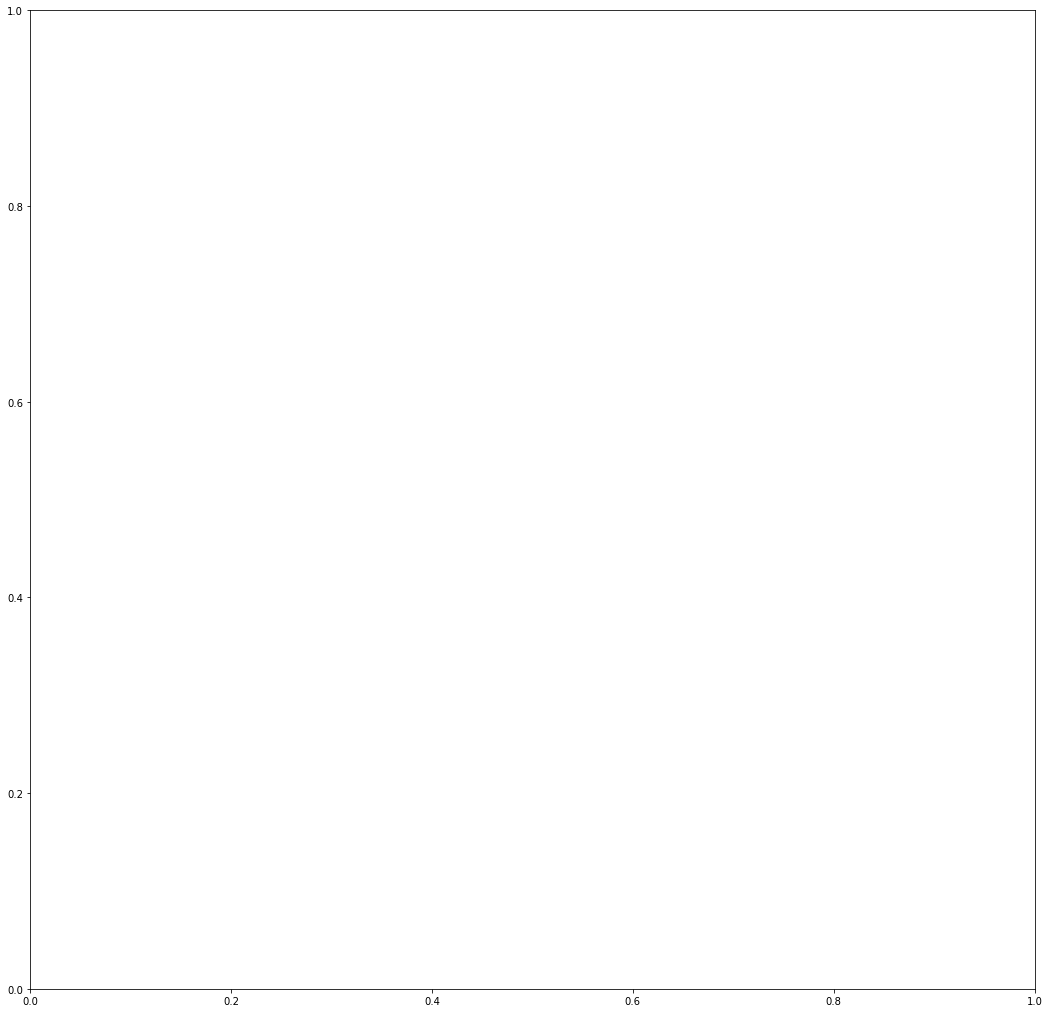

In [33]:
visual_plot.visual_plot(years_no_nan, colorfulness_no_nan, image_paths_no_nan)